
# Project: Data Wrangling


### Objective:
wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations.

<b>Analyst:</b> Neo Nakedi



## Step 1: Gathering Data

In [1]:
#Import python libraries
import pandas as pd
import requests
import numpy as np
import os
import tweepy
import matplotlib.pyplot as plt
import json
from tweepy import OAuthHandler
from timeit import default_timer as timer

#Set options
pd.options.display.float_format = '{:.2f}'.format #Supress scientific notation and use 2 decimals
%matplotlib inline


### 1.0 Import Twitter archive list
> Dataframe of Tweet ids that will be used with the Tweepy API, to extract Tweets

In [2]:
df_arctweets=pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#Check whether data is imported correctly
df_arctweets.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
df_arctweets.shape

(2356, 17)

### 1.1 Download data using code
> Download the <i>**image_predictions.tsv**</i> from Udacity's servers.
This data contains image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).

In [5]:
# Define variables for the request and file write
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Save Tab Separated Values (tsv) data to file in my current working directory
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [6]:
#List directory to check file
print('Files in working directory:')
for files in os.listdir():
    print(files)

Files in working directory:
.idea
.ipynb_checkpoints
image_predictions.tsv
test.py
tweet-json.txt
tweet_json.txt
twitter-archive-enhanced.csv
twitter_archive_master.csv
wrangle_act - Copy.ipynb.bak
wrangle_act.ipynb


In [7]:
#import image_predictions.tsv to check file
df_images=pd.read_csv('image_predictions.tsv',sep='\t')
df_images.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.47,True,collie,0.16,True,Shetland_sheepdog,0.06,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.51,True,miniature_pinscher,0.07,True,Rhodesian_ridgeback,0.07,True


In [8]:
df_images.shape

(2075, 12)

### 1.2 Additional data from the Twitter API
>Download the <i>**tweet_json.txt**</i> via Tweepy.
>
>Gather each tweet's retweet count and favorite ("like") count at the minimum.
>
>Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file.

In [ ]:

# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'BxkC********************************'
consumer_secret = '5pL6*****************************'
access_token = '710*********************************'
access_secret = 'Nv8O*******************************'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_arctweets.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1.2.1 Read JSON file into a pandas dataframe

In [9]:
df_tweets = pd.read_json('tweet-json.txt', lines=True)

df_tweets.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.00,0.00,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.00,0.00,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.00,0.00,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.00,0.00,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.00,0.00,en,NaN,NaN,NaN,NaN


In [10]:
df_tweets.shape

(2354, 31)

## Step 2: Assessing Data
> Assess all data visually and programmatically

> <b>Notes</b>:


> - Original ratings (no retweets) that have images. Not all tweets are dog ratings and some are retweets.
> - Assess and clean at least 8 quality issues and at least 2 tidiness issues in the datasets.
> - Some rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
> - Tweets up to August 1st, 2017.

#### 2.1 Tweepy API Tweets (df_tweets)
>

<b>Attribute - (Type) - Description</b>
1. <b>created_at</b> - (String) - UTC time when this Tweet was created
2. <b>id</b> - (Int64) - The integer representation of the unique identifier for this Tweet.
3. <b>text</b> - (Str) - The actual UTF-8 text of the status update.
4. <b>source</b> - (Str) -	Utility used to post the Tweet, as an HTML-formatted string.
5. <b>retweeted_status</b> - (Str) -	Users can amplify the broadcast of Tweets authored by other users by retweeting .
6. <b>retweet_count</b> - (Int) -	Number of times this Tweet has been retweeted.
7. <b>favorite_count</b> - (Int) -	Nullable.Indicates approximately how many times this Tweet has been liked by Twitter users.
8. <b>favorited</b> - (Bool) - Nullable.Indicates whether this Tweet has been liked by the authenticating user.
9. <b>retweeted</b> - (Bool) - Indicates whether this Tweet has been Retweeted by the authenticating user.

<i>Source: https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/tweet </i>


<b>2.1.1 - Visually assess data</b>

In [11]:
df_tweets.head(20)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.00,0.00,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.00,0.00,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.00,0.00,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.00,0.00,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.00,0.00,en,NaN,NaN,NaN,NaN
5,2017-07-29 00:08:17+00:00,891087950875897856,891087950875897856,Here we have a majestic great white breaching ...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,20562,False,False,0.00,0.00,en,NaN,NaN,NaN,NaN
6,2017-07-28 16:27:12+00:00,890971913173991426,890971913173991424,Meet Jax. He enjoys ice cream so much he gets ...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,12041,False,False,0.00,0.00,en,NaN,NaN,NaN,NaN
7,2017-07-28 00:22:40+00:00,890729181411237888,890729181411237888,When you watch your owner call another dog a g...,False,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,56848,False,False,0.00,0.00,en,NaN,NaN,NaN,NaN
8,2017-07-27 16:25:51+00:00,890609185150312448,890609185150312448,This is Zoey. She doesn't want to be one of th...,False,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,28226,False,False,0.00,0.00,en,NaN,NaN,NaN,NaN
9,2017-07-26 15:59:51+00:00,890240255349198849,890240255349198848,This is Cassie. She is a college pup. Studying...,False,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,32467,False,False,0.00,0.00,en,NaN,NaN,NaN,NaN


In [12]:
df_tweets.tail(20)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
2334,2015-11-16 15:14:19+00:00,666273097616637952,666273097616637952,Can take selfies 11/10 https://t.co/ws2AMaNwPW,False,"[0, 46]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666273081518768128, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,184,False,False,0.00,0.00,en,NaN,NaN,NaN,NaN
2335,2015-11-16 14:57:41+00:00,666268910803644416,666268910803644416,Very concerned about fellow dog trapped in com...,False,"[0, 82]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666268904428277760, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,108,False,False,0.00,0.00,en,NaN,NaN,NaN,NaN
2336,2015-11-16 04:02:55+00:00,666104133288665088,666104133288665088,Not familiar with this breed. No tail (weird)....,False,"[0, 134]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666104129232740352, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,14765,False,False,0.00,0.00,en,NaN,NaN,NaN,NaN
2337,2015-11-16 03:55:04+00:00,666102155909144576,666102155909144576,Oh my. Here you are seeing an Adobe Setter giv...,False,"[0, 128]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666102150364286977, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,81,False,False,0.00,0.00,en,NaN,NaN,NaN,NaN
2338,2015-11-16 03:44:34+00:00,666099513787052032,666099513787052032,Can stand on stump for what seems like a while...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666099505364733952, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,164,False,False,0.00,0.00,en,NaN,NaN,NaN,NaN
2339,2015-11-16 03:22:39+00:00,666094000022159362,666094000022159360,This appears to be a Mongolian Presbyterian mi...,False,"[0, 132]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666093996847063040, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,169,False,False,0.00,0.00,en,NaN,NaN,NaN,NaN
2340,2015-11-16 02:38:37+00:00,666082916733198337,666082916733198336,Here we have a well-established sunblockerspan...,False,"[0, 125]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666082912819875840, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,121,False,False,0.00,0.00,en,NaN,NaN,NaN,NaN
2341,2015-11-16 01:59:36+00:00,666073100786774016,666073100786774016,Let's hope this flight isn't Malaysian (lol). ...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666073098362486784, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,335,False,False,0.00,0.00,en,NaN,NaN,NaN,NaN
2342,2015-11-16 01:52:02+00:00,666071193221509120,666071193221509120,Here we have a northern speckled Rhododendron....,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666071190449033216, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,154,False,False,0.00,0.00,en,NaN,NaN,NaN,NaN
2343,2015-11-16 01:22:45+00:00,666063827256086533,666063827256086528,This is the happiest dog you will ever see. Ve...,False,"[0, 107]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666063820255862784, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,496,False,False,0.00,0.00,en,NaN,NaN,NaN,NaN


<b>2.1.2 - Visual observations</b>
Viewed in Pandas & Excel
> 1. Some fields such as extended entities, source, entities etc, contain python dictionaries, lists and html tags.
>
> 2. There are some confusing columns that appear to be the same such as 'retweeted' and 'tweet status',
>  id and id_str is a duplicate column, the only difference is the data type
> 3. A number of columns contain null values ('NaN)

<b>2.1.3 - Programmatically assess JSON Tweets(df_tweets) dataset</b>
We will look at the following characteristics:
> 1. Information of the dataframe to identify data types
> 2. Missing data - count nulls
> 3. Statistics (describe df) to identify mean, min and max. Outliers
> 4. Check for duplicates
> 5. Date/time

1. Information of the dataframe to identify data types

In [13]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

<b>Observations:</b>
- Most fields have null values which cannot be filled.
- These fields are not important for analysis, therefore no need to drop the rows because they have important data

2. Missing data - count nulls

In [14]:
df_tweets.isna().sum().sort_values(ascending=False)

geo                              2354
coordinates                      2354
contributors                     2354
place                            2353
quoted_status                    2326
quoted_status_id_str             2325
quoted_status_id                 2325
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
in_reply_to_screen_name          2276
retweeted_status                 2175
extended_entities                 281
possibly_sensitive_appealable     143
possibly_sensitive                143
display_text_range                  0
favorite_count                      0
lang                                0
retweeted                           0
favorited                           0
id_str                              0
retweet_count                       0
is_quote_status                     0
entities                            0
full_text                           0
truncated   

<b>Observations:</b>
- The null values do not appear to be an issue for now

3. Statistics (describe df) to identify mean, min and max. Outliers

In [15]:
df_tweets.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2354.00,2354.00,78.00,78.00,78.00,78.00,0.00,0.00,0.00,2354.00,2354.00,2211.00,2211.00,29.00,29.00
mean,742697816435063552.00,742697816435063552.00,745507917855750656.00,745507917855750656.00,20141706360873208.00,20141706360873208.00,NaN,NaN,NaN,3164.80,8080.97,0.00,0.00,816268554633332608.00,816268554633332608.00
std,68528120712910648.00,68528120712910648.00,75824920044192880.00,75824920044192880.00,125279666255236320.00,125279666255236320.00,NaN,NaN,NaN,5284.77,11814.77,0.00,0.00,61641605265675568.00,61641605265675568.00
min,666020888022790144.00,666020888022790144.00,665814696700723200.00,665814696700723200.00,11856342.00,11856342.00,NaN,NaN,NaN,0.00,0.00,0.00,0.00,672108316018024448.00,672108316018024448.00
25%,678397510244808704.00,678397510244808704.00,675741911993464832.00,675741911993464832.00,308637448.75,308637448.75,NaN,NaN,NaN,624.50,1415.00,0.00,0.00,788818328538099712.00,788818328538099712.00
50%,719459571111233536.00,719459571111233536.00,703870840226598912.00,703870840226598912.00,4196983835.00,4196983835.00,NaN,NaN,NaN,1473.50,3603.50,0.00,0.00,834086676934836224.00,834086676934836224.00
75%,799305849241918464.00,799305849241918464.00,825780371286566912.00,825780371286566912.00,4196983835.00,4196983835.00,NaN,NaN,NaN,3652.00,10122.25,0.00,0.00,866458718883467264.00,866458718883467264.00
max,892420643555336192.00,892420643555336192.00,886266357075128320.00,886266357075128320.00,840547864354918400.00,840547864354918400.00,NaN,NaN,NaN,79515.00,132810.00,0.00,0.00,886053434075471872.00,886053434075471872.00


<b>Observations:</b>
- No issues identified from statistics

4. Check for duplicates

In [16]:
df_tweets['id'].duplicated().sum()

0

<b>Observations:</b>
> - No duplicates identified

5. Date/time assessment

In [17]:
#Create day of the week column
df_tweets['day']=df_tweets['created_at'].dt.day_name()

df_tweets.groupby('day')['id'].count().sort_values(ascending=False)

day
Monday       384
Tuesday      356
Wednesday    353
Friday       332
Thursday     326
Saturday     309
Sunday       294
Name: id, dtype: int64

In [18]:
#Create Year column
df_tweets['year']=df_tweets['created_at'].dt.year
df_tweets.groupby('year')['id'].count().sort_values(ascending=False)

year
2016    1182
2015     690
2017     482
Name: id, dtype: int64

<b>Observations:</b>
> - All days of the week are represented in the dataset
> - Dataset covers tweets over a period of 3 years

#### 2.2 Image predictions dataset (df_images)
><b>2.2.1 - Visually assess data</b>

In [19]:
df_images.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.47,True,collie,0.16,True,Shetland_sheepdog,0.06,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.51,True,miniature_pinscher,0.07,True,Rhodesian_ridgeback,0.07,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.60,True,malinois,0.14,True,bloodhound,0.12,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.41,True,redbone,0.36,True,miniature_pinscher,0.22,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.56,True,Rottweiler,0.24,True,Doberman,0.15,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.65,True,English_springer,0.26,True,Greater_Swiss_Mountain_dog,0.02,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.93,False,mud_turtle,0.05,False,terrapin,0.02,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.69,True,Tibetan_mastiff,0.06,True,fur_coat,0.05,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.96,False,shopping_basket,0.01,False,golden_retriever,0.01,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.20,True,komondor,0.19,True,soft-coated_wheaten_terrier,0.08,True


In [20]:
df_images.tail(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.81,True,Rhodesian_ridgeback,0.05,True,beagle,0.04,True
2056,888554962724278272,https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg,3,Siberian_husky,0.70,True,Eskimo_dog,0.17,True,malamute,0.11,True
2057,888804989199671297,https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg,1,golden_retriever,0.47,True,Labrador_retriever,0.18,True,English_setter,0.07,True
2058,888917238123831296,https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg,1,golden_retriever,0.71,True,Tibetan_mastiff,0.12,True,Labrador_retriever,0.11,True
2059,889278841981685760,https://pbs.twimg.com/ext_tw_video_thumb/88927...,1,whippet,0.63,True,borzoi,0.19,True,Saluki,0.03,True
2060,889531135344209921,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,golden_retriever,0.95,True,Labrador_retriever,0.01,True,redbone,0.01,True
2061,889638837579907072,https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg,1,French_bulldog,0.99,True,boxer,0.00,True,Staffordshire_bullterrier,0.00,True
2062,889665388333682689,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,1,Pembroke,0.97,True,Cardigan,0.03,True,basenji,0.00,True
2063,889880896479866881,https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg,1,French_bulldog,0.38,True,Labrador_retriever,0.15,True,muzzle,0.08,False
2064,890006608113172480,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1,Samoyed,0.96,True,Pomeranian,0.01,True,chow,0.01,True


<b>2.2.2 - Visual observations</b>
Viewed in Pandas & Excel
> 1. Some tweets has more than 1 image but one jpg_url. Expected two jpg_urls.
> 2. Sentence case appears to be inconsistent in 'P1, P2, P3'. This will cause issues with grouping, since some items are Caps with
> underscores. Naming convention is inconsistent.
> 3. Some images do not contain dogs, they contain fruits, which could mean that some of the tweets could come from a different source
> other than WeRateDogs.

<b>2.2.3 - Programmatically assess Image Prediction dataset</b>
We will look at the following characteristics:
> 1. Information of the dataframe to identify data types
> 2. Missing data - count nulls
> 3. Tweet images that are not dogs
> 4. Statistics (describe df) to identify mean, min and max. Outliers
> 5. Look for potential duplicates
> 6. Look at the shape of the dataframe
> 7. Items that are out of scope or does not meet requires (eg. Retweets)

1 - Information of the dataframe to identify data types

In [21]:
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


<b>Observations:</b>
- Datatypes appear to meet expectations, no issues noted

2 - Missing data - nulls & blanks

In [22]:
df_images.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

<b>Observations:</b>
- No missing values, nothing to fill or drop.

3 - Tweet images that are not dogs

In [23]:
print('Number of tweets with no dogs predicted: ',
      df_images.query('p1_dog == False & p2_dog == False & p3_dog == False')['tweet_id'].count())

Number of tweets with no dogs predicted:  324


In [24]:
breeds = ['p1', 'p2', 'p3']
for i, breeds in enumerate(breeds):
    print(df_images.groupby([breeds])['tweet_id'].count().sort_values(ascending=False).head(10))

p1
golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
chow                   44
Samoyed                43
toy_poodle             39
Pomeranian             38
cocker_spaniel         30
Name: tweet_id, dtype: int64
p2
Labrador_retriever          104
golden_retriever             92
Cardigan                     73
Chihuahua                    44
Pomeranian                   42
French_bulldog               41
Chesapeake_Bay_retriever     41
toy_poodle                   37
cocker_spaniel               34
Siberian_husky               33
Name: tweet_id, dtype: int64
p3
Labrador_retriever           79
Chihuahua                    58
golden_retriever             48
Eskimo_dog                   38
kelpie                       35
kuvasz                       34
Staffordshire_bullterrier    32
chow                         32
cocker_spaniel               31
beagle                       31
Name: tweet_id, dtype: int64



<b>Observations:</b>
- Dogs with high distribution should yield higher confidence predictions

4 - Statistics (Describe)

In [25]:
df_images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2075.00,2075.00,2075.00,2075.00,2075.00
mean,738451357852539008.00,1.20,0.59,0.13,0.06
std,67852033330235656.00,0.56,0.27,0.10,0.05
min,666020888022790144.00,1.00,0.04,0.00,0.00
25%,676483507139540992.00,1.00,0.36,0.05,0.02
50%,711998809858043904.00,1.00,0.59,0.12,0.05
75%,793203448525178880.00,1.00,0.84,0.20,0.09
max,892420643555336192.00,4.00,1.00,0.49,0.27


<b>Observations:</b>
- 324 tweets do not contain any dog images or AI failed to identify the dog
- Max number of images for a single tweet is 4. It is not clear which of the 4 images was used for prediction
- The data does not indicate which image was assessed, if more than one image was available

5 - Look for duplicates

In [26]:
df_images['tweet_id'].duplicated().sum()

0

In [27]:
df_images['jpg_url'].duplicated().sum()

66

<b>Observations:</b>
- There are no duplicate tweets.
- There are duplicate image urls under unique tweet ids, this is unexpected.
- This means might indicate that there are retweets in this dataset, but no retweet flag

#### 2.3 Twitter Archive (df_arctweets)
><b>2.3.1 - Visually assess data</b>

In [28]:
df_arctweets.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [29]:
df_arctweets.tail(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2336,666273097616637952,NaN,NaN,2015-11-16 15:14:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Can take selfies 11/10 https://t.co/ws2AMaNwPW,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666273097...,11,10,None,None,None,None,None
2337,666268910803644416,NaN,NaN,2015-11-16 14:57:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Very concerned about fellow dog trapped in com...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666268910...,10,10,None,None,None,None,None
2338,666104133288665088,NaN,NaN,2015-11-16 04:02:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Not familiar with this breed. No tail (weird)....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
2339,666102155909144576,NaN,NaN,2015-11-16 03:55:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my. Here you are seeing an Adobe Setter giv...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666102155...,11,10,None,None,None,None,None
2340,666099513787052032,NaN,NaN,2015-11-16 03:44:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Can stand on stump for what seems like a while...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666099513...,8,10,None,None,None,None,None
2341,666094000022159362,NaN,NaN,2015-11-16 03:22:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This appears to be a Mongolian Presbyterian mi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666094000...,9,10,None,None,None,None,None
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
2345,666063827256086533,NaN,NaN,2015-11-16 01:22:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest dog you will ever see. Ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666063827...,10,10,the,None,None,None,None


<b>2.3.2 - Visual observations</b>
Viewed in Pandas & Excel
- Some tweets tweets have 'None' value on all columns (doggo, floofer, pupper, puppo)
- Some dogs do not have names, the tweet text did not provide names
- Some names are incorrect, for example, if the tweet starts with "This is a", then the name is "a"

<b>2.3.3 - Programmatically assess Twitter Archive dataset</b>
We will look at the following characteristics:
> 1. Information of the dataframe to identify data types
> 2. Missing data - count nulls
> 3. Statistics (describe df) to identify mean, min and max. Outliers
> 4. Look for potential duplicates
> 5. Dog ratings
> 6. Personality
> 7. Date/time

1. Information of the dataframe to identify data types

In [30]:
df_arctweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

<b>Observations:</b>
- Incorrect datatypes for timestamp & retweeted_timestamp columns
- Incorrect datatypes for retweet_status_id & *_user_id

2. Missing data - count nulls

In [31]:
df_arctweets.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

<b>Observations:</b>
- The null values are not an issue, because they don't represent incomplete data
- In this instance, it is an indicator that there was no retweet or reply

3. Statistics (describe df) to identify mean, min and max. Outliers

In [32]:
df_arctweets.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2356.00,78.00,78.00,181.00,181.00,2356.00,2356.00
mean,742771590321719808.00,745507917855750656.00,20141706360873208.00,772039961038007040.00,12416983653017580.00,13.13,10.46
std,68567047444761032.00,75824920044192880.00,125279666255236320.00,62369278105055600.00,95992535331517536.00,45.88,6.75
min,666020888022790144.00,665814696700723200.00,11856342.00,666104133288665088.00,783214.00,0.00,0.00
25%,678398938214475776.00,675741911993464832.00,308637448.75,718631497683582976.00,4196983835.00,10.00,10.00
50%,719627934716235776.00,703870840226598912.00,4196983835.00,780465709297995776.00,4196983835.00,11.00,10.00
75%,799337304954252288.00,825780371286566912.00,4196983835.00,820314633777061888.00,4196983835.00,12.00,10.00
max,892420643555336192.00,886266357075128320.00,840547864354918400.00,887473957103951872.00,787461778435289088.00,1776.00,170.00


<b>Observations:</b>
- Outliers in rating numerator:
-- The minimum numerator is 0, which means that there was no rating for some dogs
-- The maximum is 1776, which is very high and unusual
- Outliers in rating denominator:
-- The denominator should be fixed at 10, therefore the mean should be 10 and std deviation should be 0. The mean is 10.46
-- The minimum is 0 and the maximum is 170, which is out of range, where 10 was expected for both

4. Look for potential duplicates

In [33]:
df_arctweets.duplicated().sum()

0

<b>Observations:</b>
- No duplicates

5. Dog ratings (Numerator & Denominator)

In [34]:
print('Number of tweets without a rating (no Numerator & Denominator) :',
      df_arctweets[(df_arctweets['rating_numerator'] == 0.00) & (df_arctweets['rating_denominator'] == 0.00) ].tweet_id.count())

print('Number of tweets without Numerator :',
      df_arctweets[(df_arctweets['rating_numerator'] == 0.00)].tweet_id.count())

print('Number of tweets without Denominator :',
      df_arctweets[(df_arctweets['rating_denominator'] == 0.00)  ].tweet_id.count())

print('Invalid ratings (denominator not equal to 10) :',
      df_arctweets[(df_arctweets['rating_denominator'] != 10)  ].tweet_id.count())

Number of tweets without a rating (no Numerator & Denominator) : 0
Number of tweets without Numerator : 2
Number of tweets without Denominator : 1
Invalid ratings (denominator not equal to 10) : 23



<b>Observations:</b>
- There are issues with the ratings, both on the numerator and denominator

6. Personality (doggo, floofer, pupper, puppo)

In [35]:
no_personality =df_arctweets[(df_arctweets['doggo'] == 'None') &
                             (df_arctweets['floofer'] == 'None') &
                             (df_arctweets['pupper'] == 'None') &
                             (df_arctweets['puppo'] == 'None')].tweet_id.count()

print('Number of tweets without a rating (no Numerator & Denominator) :', no_personality)
print('As a percentage of the population: ', f"{no_personality/df_arctweets['tweet_id'].count():.2%}")

Number of tweets without a rating (no Numerator & Denominator) : 1976
As a percentage of the population:  83.87%


<b>Observations:</b>
- There is a significant number of tweets with dogs that have no personality type indicated
- This could have an impact on the ratings of such dogs
- 16% of dogs have a personality type

7. Date/time

In [36]:
df_arctweets['timestamp'].dtypes

dtype('O')

<b>Observations:</b>
- Timestamp is stored as object instead of date/time

### Summary of Observations
### Quality issues
><b>API Tweets (df_tweets)</b>
1. The data is incomplete because some tweets failed to download, at least 14 tweets were unsuccessful

><b>Image Predictions (df_images)</b>
2. A number of tweets had more than one image, but the dataset does not indicate which image was used for prediction

3. There are 66 duplicate image urls, which could indicate that there are some retweets, since all tweet ids are unique

4. 324 tweets do not contain any dog images or AI failed to identify the dog


><b>Twitter Archive (df_achtweets)</b>
5. Incorrect data types. Date/time stored as objects

6. 84% of the tweets do not have a personality for the dog

7. There are two tweets without a 0 numerator and one tweet with a 0 denominator

8. There are 23 tweets with a denominator that is greater than 10, i.e invalid ratings

9. There are retweets in the dataset
>
>
### Tidiness
><b>API Tweets (df_tweets)</b>
1. Columns doggo,floofer, pupper & puppo represent a single variable and should have been in one column
><b>Twitter Archive (df_achtweets)</b>
2. Incorrect data types. Date/time stored as objects



## Step 3: Clean the datasets

#### 3.1 Tweepy API Tweets (df_tweets)


<b>Define:</b>
- Remove retweets
- Remove tweets with no images


<b>Code:</b>

In [37]:
df_tweets_clean = df_tweets.copy()

In [38]:

df_tweets_clean= df_tweets_clean[df_tweets['extended_entities'].notna()].reset_index()
df_tweets_clean= df_tweets_clean[df_tweets_clean['retweeted'] == False]

<b>Test:</b>

In [39]:
df_tweets_clean.groupby(['retweeted'])['id'].count()

retweeted
False    2073
Name: id, dtype: int64

In [40]:
print('Number of tweets without images: ',df_tweets_clean['extended_entities'].isna().sum())

Number of tweets without images:  0


<b>Define:</b>
- Remove unnecessary columns and keep the columns that are interesting:
-- created_at, id, full_text, retweet count, favourite count
- Add day from date time column


<b>Code:</b>

In [41]:
#keep specific columns
df_tweets_clean=df_tweets_clean[['id','retweet_count','favorite_count','full_text']]


<b>Test:</b>

In [42]:
#Check fields
df_tweets_clean.head(3)

,id,retweet_count,favorite_count,full_text
0,892420643555336193,8853,39467,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,6514,33819,This is Tilly. She's just checking pup on you....
2,891815181378084864,4328,25461,This is Archie. He is a rare Norwegian Pouncin...


#### 3.2 Image Prediction (df_images)

<b>Define:</b>
- Keep tweets with dog images only
- Keep tweet id and the breed identified:
-- Test each field where dog is True, and create new column where dog is identified in the p1,2 or 3
-- If no dog is identified, drop row
- Clean up dog names

<b>Code:</b>

In [43]:
#Create a copy of dataframe
df_images_clean = df_images.copy()


In [44]:
# Create a function that loops each row to check if the prediction is a dog
def best_dog(row):
    if row['p1_dog']:
        return row['p1']
    elif row['p2_dog']:
        return row['p2']
    elif row['p3_dog']:
        return row ['p3']
    else:
        return 'None'

# Create breed column for the breed identified, returning 'None' if nothing is found
df_images_clean['breed']= df_images_clean.apply(best_dog, axis=1)

In [45]:
#Drop rows where no dogs were identified in all 3 predictions
df_images_clean = df_images_clean[df_images_clean['breed']!= 'None']

In [46]:
#Columns to keep
df_images_clean = df_images_clean[['tweet_id','breed', 'jpg_url']]

In [47]:
#Correct breed names format by removing '_' and using title sentence case
df_images_clean['breed'] = df_images_clean['breed'].str.replace('_', ' ').str.title()

<b>Test:</b>

In [48]:
#test if all none dog images were dropped
print('Number of tweets with no dogs predicted: ',
      df_images_clean.query('breed == "None" ')['tweet_id'].count())

Number of tweets with no dogs predicted:  0


In [49]:
#Check columns and counts
df_images_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  1751 non-null   int64 
 1   breed     1751 non-null   object
 2   jpg_url   1751 non-null   object
dtypes: int64(1), object(2)
memory usage: 54.7+ KB


In [50]:
#Check breed names formatting
df_images_clean.head(5)

,tweet_id,breed,jpg_url
0,666020888022790149,Welsh Springer Spaniel,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg
1,666029285002620928,Redbone,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg
2,666033412701032449,German Shepherd,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg
3,666044226329800704,Rhodesian Ridgeback,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg
4,666049248165822465,Miniature Pinscher,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg


#### 3.3 Twitter Archive (df_arctweets)

<b>Define:</b>
- Correct datestamp data type
- Remove retweets
- Drop incorrect ratings, i.e denominator not equal to 10
- Create rating column (numerator/denominator) as float
- Keep desired fields

In [51]:
#Create copy of data
df_arctweets_clean = df_arctweets.copy()

<b>Code:</b>

In [52]:
#Change timestamp from object to date/time type
df_arctweets_clean['timestamp'] = pd.to_datetime(df_arctweets_clean['timestamp'], format='%Y-%m-%d')

# Add day of week
df_arctweets_clean['day']=df_arctweets_clean['timestamp'].dt.day_name()

In [53]:
# Drop retweets
df_arctweets_clean['retweeted_status_id'].fillna(value=0, inplace= True)
df_arctweets_clean = df_arctweets_clean[df_arctweets_clean['retweeted_status_id'] == 0]

In [54]:
df_arctweets_clean.reset_index(inplace= True)

In [55]:
#Drop items with incorrect denominator, i.e not equal to 10 and outliers
df_arctweets_clean=df_arctweets_clean[df_arctweets_clean['rating_denominator'] == 10]
df_arctweets_clean=df_arctweets_clean[df_arctweets_clean['rating_numerator'] < 50]

In [56]:
#Create rating field
df_arctweets_clean['rating']=df_arctweets_clean['rating_numerator']/df_arctweets_clean['rating_denominator']

In [57]:
# Create a function that loops each row to check if an personality is available
def personality(row):
    if row['doggo'] != 'None':
        return row['doggo']
    elif row['floofer'] != 'None':
        return row['floofer']
    elif row['pupper'] !='None':
        return row ['pupper']
    elif row['puppo'] != 'None':
        return row ['puppo']
    else:
        return 'None'

# Create personality column for the breed identified, returning 'None' if nothing is found
df_arctweets_clean['personality']= df_arctweets_clean.apply(personality, axis=1)

In [58]:
df_arctweets_clean= df_arctweets_clean[['tweet_id','timestamp','name','rating', 'day', 'personality']]

In [59]:
df_arctweets_clean

,tweet_id,timestamp,name,rating,day,personality
0,892420643555336193,2017-08-01 16:23:56+00:00,Phineas,1.30,Tuesday,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Tilly,1.30,Tuesday,None
2,891815181378084864,2017-07-31 00:18:03+00:00,Archie,1.20,Monday,None
3,891689557279858688,2017-07-30 15:58:51+00:00,Darla,1.30,Sunday,None
4,891327558926688256,2017-07-29 16:00:24+00:00,Franklin,1.20,Saturday,None
...,...,...,...,...,...,...
2170,666049248165822465,2015-11-16 00:24:50+00:00,None,0.50,Monday,None
2171,666044226329800704,2015-11-16 00:04:52+00:00,a,0.60,Monday,None
2172,666033412701032449,2015-11-15 23:21:54+00:00,a,0.90,Sunday,None
2173,666029285002620928,2015-11-15 23:05:30+00:00,a,0.70,Sunday,None


<b>Test:</b>

In [60]:
#Check data types and desired fileds
df_arctweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2147 entries, 0 to 2174
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   tweet_id     2147 non-null   int64              
 1   timestamp    2147 non-null   datetime64[ns, UTC]
 2   name         2147 non-null   object             
 3   rating       2147 non-null   float64            
 4   day          2147 non-null   object             
 5   personality  2147 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(3)
memory usage: 117.4+ KB


In [61]:
#Check if retweets and invalid denominators were dropped
print('Before: ',df_arctweets.shape)
print('After: ',df_arctweets_clean.shape)


Before:  (2356, 17)
After:  (2147, 6)


In [62]:
#Check stats on rating field
df_arctweets_clean['rating'].describe()

count   2147.00
mean       1.06
std        0.23
min        0.00
25%        1.00
50%        1.10
75%        1.20
max        2.70
Name: rating, dtype: float64

#### 3.4 Merge clean data sets to create master

<b>Define:</b>
- Merge all three datasets on tweetids

<b>Code:</b>

In [63]:
#Merge archive tweets with image predictions
df_merge = df_arctweets_clean.merge(df_images_clean, on='tweet_id')

In [64]:
#Merge JSON tweets into the merge above to create a master set
df_master_tweets = df_merge.merge(df_tweets_clean,left_on='tweet_id',right_on='id')

In [65]:
#Drop duplicate id column
df_master_tweets = df_master_tweets.drop('id', axis=1)

<b>Test:</b>

In [66]:
df_master_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1668 entries, 0 to 1667
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1668 non-null   int64              
 1   timestamp       1668 non-null   datetime64[ns, UTC]
 2   name            1668 non-null   object             
 3   rating          1668 non-null   float64            
 4   day             1668 non-null   object             
 5   personality     1668 non-null   object             
 6   breed           1668 non-null   object             
 7   jpg_url         1668 non-null   object             
 8   retweet_count   1668 non-null   int64              
 9   favorite_count  1668 non-null   int64              
 10  full_text       1668 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(6)
memory usage: 156.4+ KB


In [67]:
df_master_tweets.head(20)

,tweet_id,timestamp,name,rating,day,personality,breed,jpg_url,retweet_count,favorite_count,full_text
0,892177421306343426,2017-08-01 00:17:27+00:00,Tilly,1.30,Tuesday,None,Chihuahua,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,6514,33819,This is Tilly. She's just checking pup on you....
1,891815181378084864,2017-07-31 00:18:03+00:00,Archie,1.20,Monday,None,Chihuahua,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,4328,25461,This is Archie. He is a rare Norwegian Pouncin...
2,891689557279858688,2017-07-30 15:58:51+00:00,Darla,1.30,Sunday,None,Labrador Retriever,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,8964,42908,This is Darla. She commenced a snooze mid meal...
3,891327558926688256,2017-07-29 16:00:24+00:00,Franklin,1.20,Saturday,None,Basset,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,9774,41048,This is Franklin. He would like you to stop ca...
4,891087950875897856,2017-07-29 00:08:17+00:00,None,1.30,Saturday,None,Chesapeake Bay Retriever,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,3261,20562,Here we have a majestic great white breaching ...
5,890971913173991426,2017-07-28 16:27:12+00:00,Jax,1.30,Friday,None,Appenzeller,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,2158,12041,Meet Jax. He enjoys ice cream so much he gets ...
6,890729181411237888,2017-07-28 00:22:40+00:00,None,1.30,Friday,None,Pomeranian,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,16716,56848,When you watch your owner call another dog a g...
7,890609185150312448,2017-07-27 16:25:51+00:00,Zoey,1.30,Thursday,None,Irish Terrier,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,4429,28226,This is Zoey. She doesn't want to be one of th...
8,890240255349198849,2017-07-26 15:59:51+00:00,Cassie,1.40,Wednesday,doggo,Pembroke,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,7711,32467,This is Cassie. She is a college pup. Studying...
9,890006608113172480,2017-07-26 00:31:25+00:00,Koda,1.30,Wednesday,None,Samoyed,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,7624,31166,This is Koda. He is a South Australian decksha...


## Step 4: Storing data
Save the Tweets Master dataset to a csv file named "twitter_archive_master.csv"

In [68]:
df_master_tweets.to_csv('twitter_archive_master.csv')

## Step 5: Analyze and Visualize Data
- Three insights and visualizations

#### 5.1 Least popular dog breed (top 5)
- Popularity based on:
-- Tweet count
-- Ratings

In [69]:
#Popularity based on tweet counts
df_master_tweets.groupby('breed')['tweet_id'].count().sort_values(ascending=False).head(5)

breed
Golden Retriever      154
Labrador Retriever    105
Pembroke               95
Chihuahua              90
Pug                    62
Name: tweet_id, dtype: int64

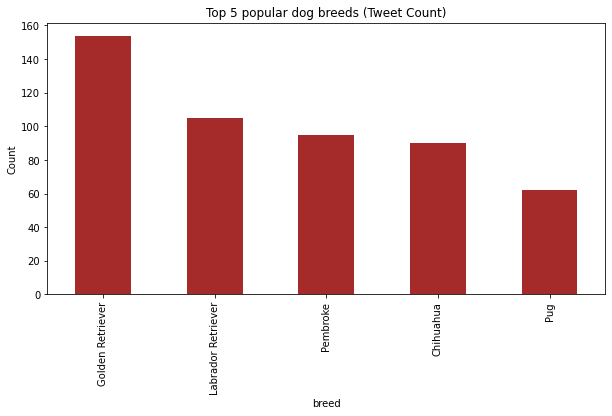

In [70]:
#Plot of popular breeds based on tweet count
df_master_tweets.groupby('breed')['tweet_id'].count().sort_values(ascending=False).head(5)\
    .plot(kind='bar', figsize=(10,5),title='Top 5 popular dog breeds (Tweet Count)',ylabel='Count', color='brown');

In [71]:
#Popularity based on average ratings
df_master_tweets.groupby('breed')['rating'].mean().sort_values(ascending=False).head(5)

breed
Clumber                2.70
Bouvier Des Flandres   1.30
Saluki                 1.25
Briard                 1.23
Tibetan Mastiff        1.23
Name: rating, dtype: float64

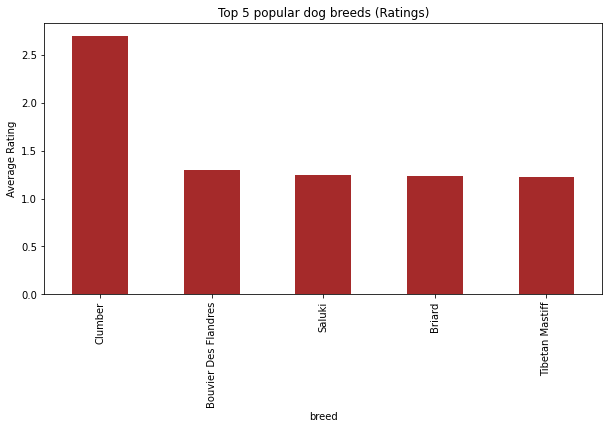

In [72]:
#Plot popularity based on average ratings
df_master_tweets.groupby('breed')['rating'].mean().sort_values(ascending=False).head(5)\
    .plot(kind='bar', figsize=(10,5),title='Top 5 popular dog breeds (Ratings)',ylabel='Average Rating', color='brown');

<b>Insights:</b>
- The dog breeds with the most tweets are not in the top 5 ratings
- This could be caused by a few outliers
- For a full picture, we will explore the relationship between these two variables

#### 5.2 Relationships
- Correlations between:
-- Ratings and tweet count
-- Favourite and Retweets

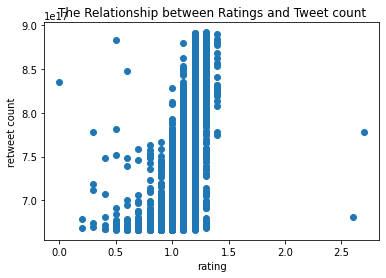

In [73]:
# Scatterplot
plt.scatter(df_master_tweets['rating'], df_master_tweets['tweet_id']);
plt.title('The Relationship between Ratings and Tweet count')
plt.xlabel('rating')
plt.ylabel('retweet count')
plt.show();

<b>Insights</b>:
- The relationship is not a direct correlation, however, having a higher tweet count does improve chances
of obtaining a higher rating
- There are a few outliers on the right side, with few tweets but high ratings. These could be rare breeds

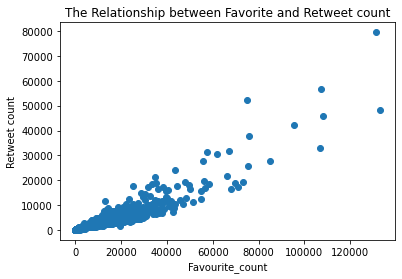

In [74]:
# Scatterplot
plt.scatter(df_master_tweets['favorite_count'], df_master_tweets['retweet_count']);
plt.title('The Relationship between Favorite and Retweet count')
plt.xlabel('Favourite_count')
plt.ylabel('Retweet count')
plt.show();

<b>Insights</b>:
- There is a positive correlation between ratings and retweet counts

#### 5.3 Date/time
- Days with the largest retweets and favourites (Which days are most busy on twitter)

In [75]:
df_master_pivot = df_master_tweets.pivot_table(index=None, columns='day', values=['retweet_count','favorite_count'], aggfunc=np.mean)
df_master_pivot

day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
favorite_count,9001.41,9027.46,9243.96,9083.33,8622.19,9623.07,10226.81
retweet_count,2720.33,2755.75,3050.66,2732.70,2542.81,2846.48,3109.07


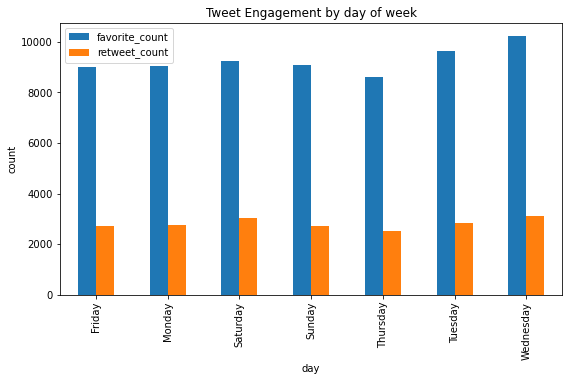

In [76]:
df_master_pivot.T.plot(kind='bar', figsize=(9,5), ylabel='count', title='Tweet Engagement by day of week');

<b>Insights:</b>
- Twitter engagement appears to be consistent regardless of day of week

#### 5.4 Personalities
- Which personalities have the most engagement (favorite & retweets)

In [77]:
df_master_pivot = df_master_tweets.pivot_table(index=None, columns='personality', values=['favorite_count','retweet_count'], aggfunc=np.mean)

In [78]:
df_master_pivot

personality,None,doggo,floofer,pupper,puppo
favorite_count,8819.64,19014.14,13206.00,7516.82,21457.81
retweet_count,2618.21,6844.56,4968.71,2416.92,6375.76


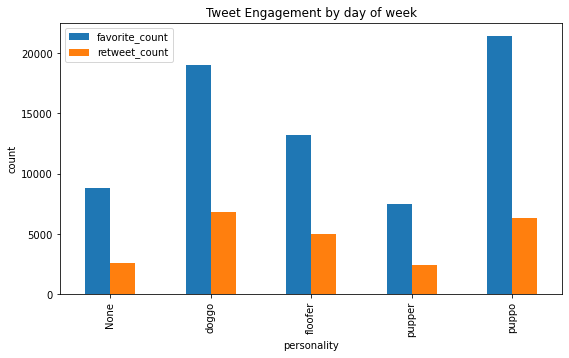

In [79]:
df_master_pivot.T.plot(kind='bar', figsize=(9,5), ylabel='count', title='Tweet Engagement by day of week');

<b>Insights:</b>
- Dog tweets without a personality appear to have the lowest engagement as expected
- Puppos are leading in favorites